Алгоритм Mean Shift. Вiдобразити графiчно центри кластерiв.
Метрики якостi: Estimated number of clusters, Adjusted Rand Index, Adjusted Mutual Information, Silhouette Coefficient.
Чи є розбиття стабiльним пiсля змiни порядку об’єктiв у множинi об’єктiв?

Початковi данi:
(а) from sklearn.datasets.samples_generator import make_blobs
X1, y_true = make_blobs (n_samples=40000, centers=4, cluster_std=0.60, random_state=0)

rng = np.random.RandomState(13)
X = np.dot(X1, rng.randn(2, 2))

(б) from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50000, n_features=2, centers=4, cluster_std=1, center_box=(−10.0, 10.0), shuffle=True, random_state=1)

# TODOList
1. Представити початковi данi графiчно.
2. Побудувати модель кластеризацiї згiдно з варiантом.
3. Виконати кластеризацiю даних на основi моделi.
4. Представити розбиття на кластери графiчно, наприклад, рiзними кольорами.
5. Розрахувати час кластеризацiї. Оцiнити швидкодiю методу на надвеликих наборах даних (наприклад, при збiльшеннi кiлькостi точок даних до тисяч i бiльше).
6. Побудувати кiлька альтернативних моделей:
- шляхом змiни значень параметрiв основної моделi,
- використати рiзнi функцiї вiдстанi в алгоритмах, де це можна зробити,
- задати рiзнi значення кiлькостi кластерiв, в алгоритмах де кiлькiсть кластерiв - параметр.
7. Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї, що реалiзованi в модулi sklearn.metrics (тiльки метрики згiдно з варiантом):
 - **Estimated Number of Clusters.**
 - **Adjusted Rand Index.**
 - **Adjusted Mutual Information.**
 - Homogeneity.
 - Completeness.
 - V-measure.
 - **Silhouette Coefficient.**
 - Calinski-Harabasz Index.
 - Davies-Bouldin index.
 - Contingency Matrix.
8. Виконати аналiз результатiв кластеризацiї одним з неформальних методiв (тiльки методом згiдно з варiантом):
- чи є розбиття стабiльним на пiдвибiрках даних,
- чи є розбиття стабiльним пiсля видалення окремих об’єктiв,
- чи є розбиття стабiльним пiсля змiни порядку об’єктiв у множинi
об’єктiв,
- чи iснує взаємозв’язок мiж результатами кластеризацiї i змiнними,
якi не враховувалися при кластеризацiї,
- чи можна iнтерпретувати результати кластеризацiї.
9. Вищенаведенi пункти виконати для заданих двох наборiв даних рiзної форми.
10. Зробити висновки про якiсть роботи моделей на дослiджених даних та про швидкодiю методу.
11. Оцiнити результати кластеризацiї на основi метрик якостi та на основi неформальних методiв. У кожному варiантi задано два набори даних.

Спробувати пiдiбрати найкращу модель кластеризацiї для кожного набору даних.

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
import time

# (a)

## 1. Представити початковi данi графiчно.

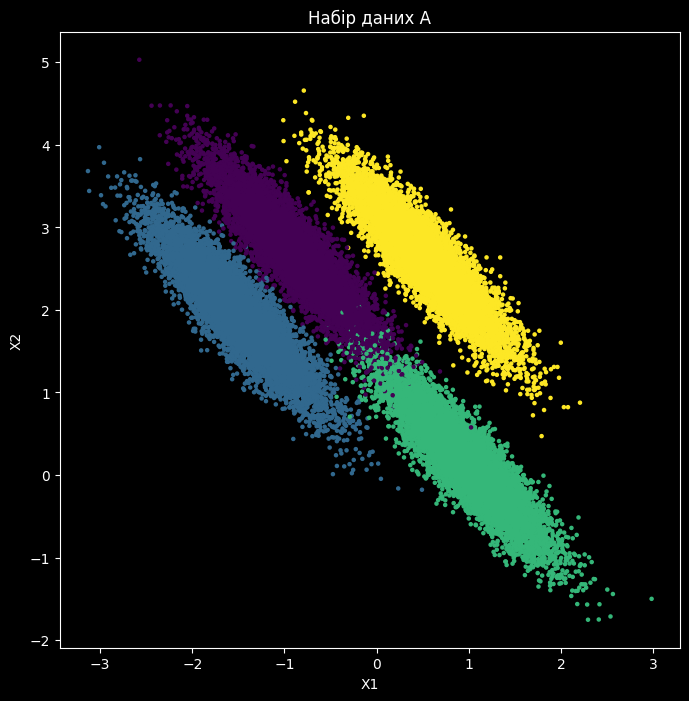

In [2]:
# Набір даних A
X1, y_true = make_blobs(n_samples=40000, centers=4, cluster_std=0.60 , random_state=0)

rng = np.random.RandomState(13)
X = np.dot(X1, rng.randn(2, 2))

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=5, cmap='viridis')
plt.title("Набір даних А")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(False)
plt.show()

#### Бачимо чотири кластери видовженої форми

## 2-4. Побудувати модель кластеризацiї згiдно з варiантом. Виконати кластеризацiю даних на основi моделi. Представити розбиття на кластери графiчно, наприклад, рiзними кольорами.

Кількість кластерів: 3
Bandwidth: 56.19 c
MeanShift: 2.38 c
Разом:     58.57 c



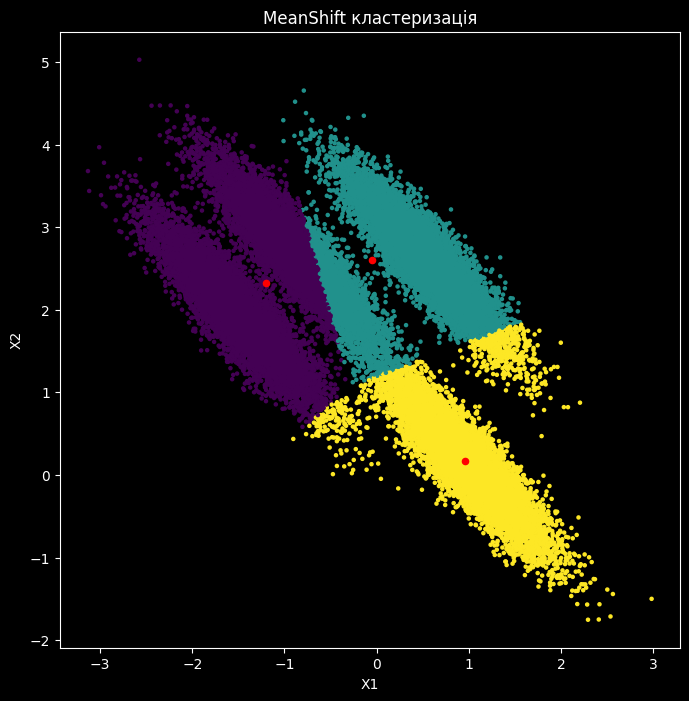

In [3]:
t1 = time.time()
bw = estimate_bandwidth(X, quantile=0.2)
t2 = time.time()
ms = MeanShift(bandwidth=bw, bin_seeding=True)
ms.fit(X)
t3 = time.time()

labels = ms.labels_
centers = ms.cluster_centers_
n_clusters = len(np.unique(labels))

print(f"Кількість кластерів: {n_clusters}")
print(f"Bandwidth: {t2 - t1:.2f} c")
print(f"MeanShift: {t3 - t2:.2f} c")
print(f"Разом:     {t3 - t1:.2f} c\n")

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20, marker='o')
plt.title("MeanShift кластеризація")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

#### Бачимо, що більшу частину часу виконання алгоритму займає обчислення Bandwidth.

## 5. Розрахувати час кластеризацiї. Оцiнити швидкодiю методу на надвеликих наборах даних (наприклад, при збiльшеннi кiлькостi точок даних до тисяч i бiльше).

In [ ]:
sizes = [40000, 80000, 100000, 200000, 300000, 500000, 1000000, 5000000]

for n in sizes:
    print(f"{n} точок")
    X, _ = make_blobs(n_samples=n, centers=4, cluster_std=0.6, random_state=0)
    X = np.dot(X, rng.randn(2, 2))

    t1 = time.time()
    bw = estimate_bandwidth(X, quantile=0.2, n_samples=2000)
    t2 = time.time()
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    ms.fit(X)
    t3 = time.time()

    print(f"Bandwidth: {t2 - t1:.2f} c")
    print(f"MeanShift: {t3 - t2:.2f} c")
    print(f"Разом:     {t3 - t1:.2f} c\n")

40000 точок
Bandwidth: 0.10 c
MeanShift: 1.33 c
Разом:     1.42 c

80000 точок
Bandwidth: 0.11 c
MeanShift: 0.84 c
Разом:     0.95 c

100000 точок
Bandwidth: 0.10 c
MeanShift: 1.10 c
Разом:     1.20 c

200000 точок
Bandwidth: 0.11 c
MeanShift: 3.34 c
Разом:     3.45 c

300000 точок
Bandwidth: 0.09 c
MeanShift: 3.87 c
Разом:     3.96 c

500000 точок
Bandwidth: 0.11 c
MeanShift: 8.12 c
Разом:     8.23 c

1000000 точок
Bandwidth: 0.12 c
MeanShift: 15.05 c
Разом:     15.17 c

5000000 точок


#### Маємо майже лінійне збільшення затрат часу відносно кількості точок.

## 6. Побудувати кiлька альтернативних моделей:
## - шляхом змiни значень параметрiв основної моделi,
## - використати рiзнi функцiї вiдстанi в алгоритмах, де це можна зробити,
## - задати рiзнi значення кiлькостi кластерiв, в алгоритмах де кiлькiсть кластерiв - параметр.

####  Маємо параметри `bandwidth` та `bin_seeding`, подивимось, як вони впливають на поведінку моделі